<a href="https://colab.research.google.com/github/vinay0varma/GithubDemo2/blob/master/Benefiaciary_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#Load dataset
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset Loaded:", filename)
df.head()


Saving beneficiary_credit_20k.csv to beneficiary_credit_20k.csv
Dataset Loaded: beneficiary_credit_20k.csv


,user_id,name,age,gender,region,education_level,occupation,annual_income,joint_income,business_income,...,repayment_score,fraud_flag,id_verified,document_validity,verification_date,last_transaction_date,beneficiary_count,credit_score,loan_status,timestamp
0,1,Pooja Murty,24,Female,Mumbai,Diploma,Teacher,3455447,3095322.0,0,...,665,0,Yes,Valid,2024-06-28 19:26:23,2024-07-08 01:09:09,6,693,Rejected,2023-01-01 00:00:00
1,2,Aarohi Patel,55,Female,Hyderabad,High School,Farmer,664482,2034183.0,906967,...,714,0,Yes,Expired,2024-07-20 17:01:45,2025-07-12 07:35:03,3,715,Approved,2023-01-01 00:01:00
2,3,Dev Kulkarni,49,Male,Ahmedabad,High School,Engineer,1817251,1666092.0,0,...,657,0,Yes,Pending,2021-01-22 22:29:38,2023-07-05 10:52:18,3,631,Approved,2023-01-01 00:02:00
3,4,Arjun Murty,40,Male,Chennai,High School,Self Employed,1783071,NaN,196432,...,525,0,Yes,Pending,2023-04-28 11:10:10,2025-03-28 22:22:15,2,537,Rejected,2023-01-01 00:03:00
4,5,Nikhil Nair,40,Male,Delhi,PhD,Teacher,1734770,NaN,0,...,609,0,Yes,Valid,2024-11-18 20:06:15,2025-03-13 21:57:05,3,635,Rejected,2023-01-01 00:04:00


In [ ]:
# Show all columns
print("Columns in dataset:")
print(df.columns)
print("\nDataset shape:", df.shape)

# Drop ID/name/timestamp columns if present
drop_cols = ['user_id','name','timestamp','verification_date','last_transaction_date']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

df.head()


Columns in dataset:
Index(['user_id', 'name', 'age', 'gender', 'region', 'education_level',
       'occupation', 'annual_income', 'joint_income', 'business_income',
       'property_value', 'loan_amount', 'repayment_score', 'fraud_flag',
       'id_verified', 'document_validity', 'verification_date',
       'last_transaction_date', 'beneficiary_count', 'credit_score',
       'loan_status', 'timestamp'],
      dtype='object')

Dataset shape: (20000, 22)


,age,gender,region,education_level,occupation,annual_income,joint_income,business_income,property_value,loan_amount,repayment_score,fraud_flag,id_verified,document_validity,beneficiary_count,credit_score,loan_status
0,24,Female,Mumbai,Diploma,Teacher,3455447,3095322.0,0,31160734,20000000,665,0,Yes,Valid,6,693,Rejected
1,55,Female,Hyderabad,High School,Farmer,664482,2034183.0,906967,8524582,2396276,714,0,Yes,Expired,3,715,Approved
2,49,Male,Ahmedabad,High School,Engineer,1817251,1666092.0,0,7643254,4595100,657,0,Yes,Pending,3,631,Approved
3,40,Male,Chennai,High School,Self Employed,1783071,NaN,196432,16058493,8811611,525,0,Yes,Pending,2,537,Rejected
4,40,Male,Delhi,PhD,Teacher,1734770,NaN,0,10155805,7323761,609,0,Yes,Valid,3,635,Rejected


In [ ]:
# Prepare data (re-assign to be explicit)
selected_features = [
    'annual_income','joint_income','property_value','business_income',
    'loan_amount','repayment_score','beneficiary_count','age'
]
target = 'credit_score'

# use df_model from before; if not present, rebuild:
try:
    df_model
except NameError:
    df_model = df[selected_features + [target]].copy()

# ensure no NaNs
df_model = df_model.fillna(df_model.median())

X = df_model[selected_features].values
y = df_model[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shapes — X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes — X_train, X_test, y_train, y_test: (16000, 8) (4000, 8) (16000,) (4000,)


In [ ]:
# Missing value handling
df_model = df_model.fillna(df_model.median())   # fill numeric NA with median
print("Any NaN left?", df_model.isnull().sum().sum())


Any NaN left? 0


In [ ]:
# Scaling for ANN (2D input)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Save scaler to disk if you want later (optional)
import joblib
joblib.dump(scaler, "credit_scaler.save")
print("Scaler saved as credit_scaler.save")
print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


Scaler saved as credit_scaler.save
Scaled shapes: (16000, 8) (4000, 8)


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16000, 8), (4000, 8))

In [ ]:
# FIXED CREDIT ANN MODEL

ann_credit = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

ann_credit.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

ann_credit.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train ANN
from tensorflow.keras.callbacks import EarlyStopping
# FIXED TRAINING SETTINGS

es = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

history_ann = ann_credit.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=120,
    batch_size=32,
    callbacks=[es],
    verbose=1
)


Epoch 1/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 367757.0000 - mae: 597.4214 - val_loss: 193488.4375 - val_mae: 427.7013
Epoch 2/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 139606.7500 - mae: 342.8317 - val_loss: 36510.8906 - val_mae: 125.0851
Epoch 3/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36482.5273 - mae: 138.8747 - val_loss: 20355.4258 - val_mae: 80.0289
Epoch 4/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28970.8320 - mae: 126.0736 - val_loss: 9923.9307 - val_mae: 58.9765
Epoch 5/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17603.9297 - mae: 102.7728 - val_loss: 2308.5203 - val_mae: 36.3876
Epoch 6/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11268.9883 - mae: 84.3416 - val_loss: 1305.4249 - val_mae: 28.9357
Epoch 7/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9055.8428 - mae: 75.8187 - val_loss: 1187.4307 - val_mae: 27.1087
Epoch 8/120
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7804.3608 - mae: 69.9353 - val_

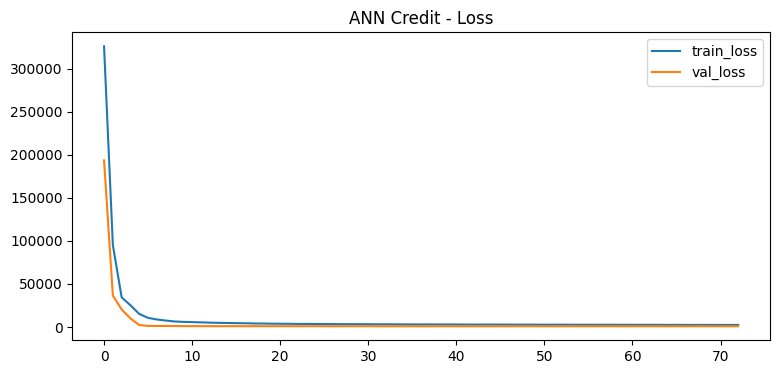

Ann Credit Test MSE: 852.745361328125
Ann Credit Test MAE: 23.026065826416016


In [ ]:
# Plot & evaluate
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.plot(history_ann.history['loss'], label='train_loss')
plt.plot(history_ann.history['val_loss'], label='val_loss')
plt.legend(); plt.title("ANN Credit - Loss")
plt.show()

test_loss, test_mae = ann_credit.evaluate(X_test_scaled, y_test, verbose=0)
print("Ann Credit Test MSE:", test_loss)
print("Ann Credit Test MAE:", test_mae)


In [ ]:
# Impute numeric NaNs with median, then rebuild + rescale
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd # Ensure pandas is imported

# List of fraud features (ensure same order)
fraud_features = [
    'annual_income','joint_income','business_income','property_value',
    'loan_amount','beneficiary_count','repayment_score','id_verified','document_validity'
]
fraud_target = 'fraud_flag'

# --- START FIX ---
# Create a temporary dataframe to perform transformations without altering the original df
df_processed = df.copy()

# Convert categorical features to numerical as per app.py logic
# 'Yes' -> 1, 'No' -> 0 for 'id_verified'. Fillna(0) for any other unexpected value.
df_processed['id_verified'] = df_processed['id_verified'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# 'Valid' -> 1, others ('Expired', 'Pending') -> 0 for 'document_validity'. Fillna(0) for any other unexpected value.
df_processed['document_validity'] = df_processed['document_validity'].map({'Valid': 1, 'Expired': 0, 'Pending': 0}).fillna(0).astype(int)

# Impute numeric columns in df_processed (median)
# Iterate through fraud_features on df_processed
for col in fraud_features:
    # Check if the column is numeric and has NaNs
    if pd.api.types.is_numeric_dtype(df_processed[col]) and df_processed[col].isnull().any():
        med = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(med)
# --- END FIX ---

# Rebuild df_fraud using the processed df_processed
df_fraud = df_processed[fraud_features + [fraud_target]].copy()

print("Any NaNs in df_fraud by column after median impute:")
print(df_fraud.isnull().sum())

# Recreate arrays and stratified split
Xf = df_fraud[fraud_features].values
yf = df_fraud[fraud_target].values
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    Xf, yf, test_size=0.2, random_state=42, stratify=yf
)

# Rescale safely (no NaNs now)
scaler_f = StandardScaler()
Xf_train_scaled = scaler_f.fit_transform(Xf_train)
Xf_test_scaled  = scaler_f.transform(Xf_test)
joblib.dump(scaler_f, "fraud_scaler.save")

print("Shapes after impute+split:", Xf_train.shape, Xf_test.shape)
print("Any NaNs in Xf_train_scaled:", np.isnan(Xf_train_scaled).sum())
print("Any Infs in Xf_train_scaled:", np.isinf(Xf_train_scaled).sum())
print("Fraud scaler saved. Ready to train.")

Any NaNs in df_fraud by column after median impute:
annual_income        0
joint_income         0
business_income      0
property_value       0
loan_amount          0
beneficiary_count    0
repayment_score      0
id_verified          0
document_validity    0
fraud_flag           0
dtype: int64
Shapes after impute+split: (16000, 9) (4000, 9)
Any NaNs in Xf_train_scaled: 0
Any Infs in Xf_train_scaled: 0
Fraud scaler saved. Ready to train.


In [ ]:
# Build ANN fraud detection model

from tensorflow.keras import layers, models

ann_fraud = models.Sequential([
    layers.Input(shape=(Xf_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

ann_fraud.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_fraud.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# Train fraud ANN with class weights
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

# compute class weights for imbalance
cw = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(yf_train),
    y=yf_train
)
class_weights = {0: float(cw[0]), 1: float(cw[1])}
print("Class weights:", class_weights)

es_fraud = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history_fraud_ann = ann_fraud.fit(
    Xf_train_scaled, yf_train,
    validation_split=0.1,
    epochs=80,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[es_fraud],
    verbose=1
)


Class weights: {0: 0.5128862674701885, 1: 19.90049751243781}
Epoch 1/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6016 - loss: 0.6626 - val_accuracy: 0.8081 - val_loss: 0.4617
Epoch 2/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.5322 - val_accuracy: 0.8012 - val_loss: 0.4355
Epoch 3/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7391 - loss: 0.5127 - val_accuracy: 0.7812 - val_loss: 0.4476
Epoch 4/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7573 - loss: 0.4628 - val_accuracy: 0.7706 - val_loss: 0.4340
Epoch 5/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7632 - loss: 0.4511 - val_accuracy: 0.7956 - val_loss: 0.4061
Epoch 6/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7767 - loss: 0.4391 - val_accuracy: 0.7775 - val_loss: 0.4399
Epoch 7/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7614 - loss: 0.4418 - val_accuracy: 0.8369 - val_loss: 0.3490
Epoch 8/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
# Evaluate fraud ANN (detailed metrics)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

# Predict probabilities and binary labels
probs = ann_fraud.predict(Xf_test_scaled).ravel()
preds = (probs >= 0.5).astype(int)

# Basic metrics
print("Confusion Matrix:")
print(confusion_matrix(yf_test, preds))

print("\nClassification Report:")
print(classification_report(yf_test, preds, digits=4))

# ROC AUC (may be small because data is imbalanced but informative)
try:
    auc = roc_auc_score(yf_test, probs)
    print(f"\nROC AUC: {auc:.4f}")
except Exception as e:
    print("ROC AUC error:", e)

# Also show precision/recall for the positive class explicitly
p, r, f, _ = precision_recall_fscore_support(yf_test, preds, average=None, labels=[1,0])
print(f"\nPositive class (fraud) — Precision: {p[0]:.4f}, Recall: {r[0]:.4f}, F1: {f[0]:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[3222  678]
 [  22   78]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9932    0.8262    0.9020      3900
           1     0.1032    0.7800    0.1822       100

    accuracy                         0.8250      4000
   macro avg     0.5482    0.8031    0.5421      4000
weighted avg     0.9710    0.8250    0.8840      4000


ROC AUC: 0.8849

Positive class (fraud) — Precision: 0.1032, Recall: 0.7800, F1: 0.1822


In [ ]:
# Save Fraud ANN Model
ann_fraud.save("fraud_ann_model.h5")
print("Fraud ANN model saved as fraud_ann_model.h5")


Fraud ANN model saved as fraud_ann_model.h5


In [ ]:
# Example predictions for first 10 test samples

probs_10 = ann_fraud.predict(Xf_test_scaled[:10]).ravel()
preds_10 = (probs_10 >= 0.5).astype(int)

for i in range(10):
    print(f"Sample {i+1}:  Fraud Probability = {probs_10[i]:.4f}   Predicted Class = {preds_10[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Sample 1:  Fraud Probability = 0.3547   Predicted Class = 0
Sample 2:  Fraud Probability = 0.1662   Predicted Class = 0
Sample 3:  Fraud Probability = 0.1825   Predicted Class = 0
Sample 4:  Fraud Probability = 0.4899   Predicted Class = 0
Sample 5:  Fraud Probability = 0.5608   Predicted Class = 1
Sample 6:  Fraud Probability = 0.0505   Predicted Class = 0
Sample 7:  Fraud Probability = 0.5555   Predicted Class = 1
Sample 8:  Fraud Probability = 0.6877   Predicted Class = 1
Sample 9:  Fraud Probability = 0.8038   Predicted Class = 1
Sample 10:  Fraud Probability = 0.1453   Predicted Class = 0


In [ ]:
# FRAUD ANN — Accuracy Calculation

loss, accuracy = ann_fraud.evaluate(Xf_test_scaled, yf_test, verbose=0)

print(f"Fraud ANN Accuracy: {accuracy:.4f}")
print(f"Fraud ANN Loss: {loss:.4f}")


Fraud ANN Accuracy: 0.8250
Fraud ANN Loss: 0.3609


In [ ]:
y_pred = ann_credit.predict(X_test_scaled).flatten()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score: 0.9151
RMSE: 29.2018


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Top 5 thresholds by Recall:
 threshold  precision  recall       f1
      0.01   0.028153     1.0 0.054765
      0.02   0.030230     1.0 0.058685
      0.03   0.031696     1.0 0.061444
      0.04   0.033190     1.0 0.064247
      0.05   0.034483     1.0 0.066667

Top 5 thresholds by F1-score:
 threshold  precision  recall       f1
      0.81   0.307692    0.40 0.347826
      0.80   0.290780    0.41 0.340249
      0.79   0.279221    0.43 0.338583
      0.82   0.310924    0.37 0.337900
      0.78   0.268293    0.44 0.333333

Suggested threshold (heuristic): {'threshold': 0.19, 'precision': 0.050261780104712044, 'recall': 0.96, 'f1': 0.0955223880597015}


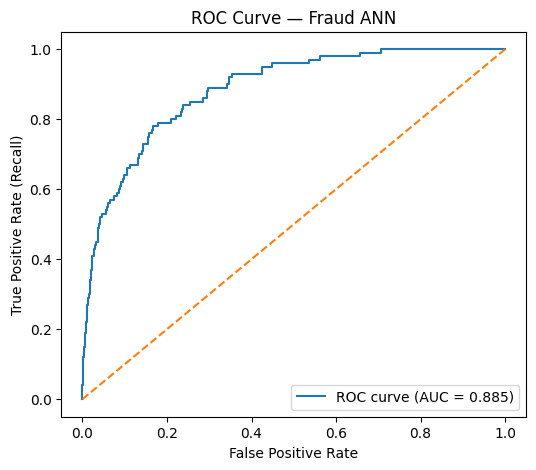


Threshold table (first 10 rows):
 threshold  precision  recall       f1
      0.01   0.028153    1.00 0.054765
      0.02   0.030230    1.00 0.058685
      0.03   0.031696    1.00 0.061444
      0.04   0.033190    1.00 0.064247
      0.05   0.034483    1.00 0.066667
      0.06   0.035471    0.99 0.068488
      0.07   0.036545    0.99 0.070488
      0.08   0.037433    0.98 0.072112
      0.09   0.038356    0.98 0.073823
      0.10   0.039660    0.98 0.076235


In [ ]:
# Threshold tuning and ROC curve

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# predicted probabilities on test set
probs = ann_fraud.predict(Xf_test_scaled).ravel()

# thresholds to try
thresholds = np.linspace(0.01, 0.99, 99)
rows = []
for t in thresholds:
    preds_t = (probs >= t).astype(int)
    p = precision_score(yf_test, preds_t, zero_division=0)
    r = recall_score(yf_test, preds_t, zero_division=0)
    f = f1_score(yf_test, preds_t, zero_division=0)
    rows.append((t, p, r, f))

df_thresh = pd.DataFrame(rows, columns=['threshold','precision','recall','f1'])
# show top thresholds by recall (useful for fraud detection) and by f1
top_recall = df_thresh.sort_values(by='recall', ascending=False).head(5)
top_f1 = df_thresh.sort_values(by='f1', ascending=False).head(5)

print("Top 5 thresholds by Recall:")
print(top_recall.to_string(index=False))
print("\nTop 5 thresholds by F1-score:")
print(top_f1.to_string(index=False))

# suggest threshold: highest recall while precision >= 0.05 (example heuristic)
candidates = df_thresh[df_thresh['precision'] >= 0.05]
if not candidates.empty:
    suggested = candidates.sort_values(by='recall', ascending=False).iloc[0]
else:
    suggested = df_thresh.sort_values(by='recall', ascending=False).iloc[0]
print("\nSuggested threshold (heuristic):", suggested.to_dict())

# ROC curve
fpr, tpr, roc_thresh = roc_curve(yf_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve — Fraud ANN')
plt.legend()
plt.show()

# Display full table head for inspection
print("\nThreshold table (first 10 rows):")
print(df_thresh.head(10).to_string(index=False))


In [ ]:
%%writefile app.py
# app.py
# app.py
import streamlit as st
import numpy as np
import joblib
import os
import tensorflow as tf

st.set_page_config(page_title="Beneficiary Credit Scoring", page_icon="📊", layout="centered")

# --- Helper: file existence check ---
REQUIRED_FILES = [
    "ann_credit_score.h5",
    "fraud_ann_model.h5",
    "credit_scaler.save",
    "fraud_scaler.save",
]

st.title("📊 Beneficiary Credit Scoring & Income Verification (Demo)")

missing = [f for f in REQUIRED_FILES if not os.path.exists(f)]
if missing:
    st.error("Missing files required to run the app:")
    for m in missing:
        st.write(f"- `{m}`")
    st.info("Place the required files in the same folder as this app and re-run:\n`ann_credit_score.h5`, `fraud_ann_model.h5`, `credit_scaler.save`, `fraud_scaler.save`")
    st.stop()

# --- Load models and scalers (once) ---
@st.cache_resource(show_spinner=False)
def load_models_and_scalers():
    # Load Keras models
    credit_model = tf.keras.models.load_model("ann_credit_score.h5")
    fraud_model = tf.keras.models.load_model("fraud_ann_model.h5")
    # Load scalers
    credit_scaler = joblib.load("credit_scaler.save")
    fraud_scaler = joblib.load("fraud_scaler.save")
    return credit_model, fraud_model, credit_scaler, fraud_scaler

credit_model, fraud_model, credit_scaler, fraud_scaler = load_models_and_scalers()

# Default fraud threshold (you can change interactively)
THRESHOLD = st.sidebar.slider("Fraud probability threshold", min_value=0.01, max_value=0.99, value=0.23, step=0.01)

st.markdown("### Enter beneficiary details")
st.info("Make sure the feature order matches how your models were trained (see notes below).")

# --- Inputs (match training order in notebook)
annual_income = st.number_input("Annual Income (₹)", min_value=0.0, value=100000.0, step=1000.0, format="%.2f")
joint_income  = st.number_input("Joint Income (₹)", min_value=0.0, value=50000.0, step=1000.0, format="%.2f")
property_value = st.number_input("Property Value (₹)", min_value=0.0, value=0.0, step=1000.0, format="%.2f")
business_income = st.number_input("Business Income (₹)", min_value=0.0, value=0.0, step=1000.0, format="%.2f")
loan_amount = st.number_input("Loan Amount (₹)", min_value=0.0, value=0.0, step=1000.0, format="%.2f")
repayment_score = st.number_input("Repayment Score (numeric)", min_value=0.0, value=600.0, step=1.0, format="%.1f")
beneficiary_count = st.number_input("Number of family members (beneficiary_count)", min_value=0, value=1, step=1)
age = st.number_input("Age (years)", min_value=16, max_value=120, value=30, step=1)

id_verified_sel = st.selectbox("ID Verified?", ("No", "Yes"))
document_validity_sel = st.selectbox("Documents Valid?", ("Invalid", "Valid"))

# Convert categorical to numeric consistent with notebook mapping
id_verified_val = 1 if id_verified_sel == "Yes" else 0
document_validity_val = 1 if document_validity_sel == "Valid" else 0

st.write("---")
col1, col2 = st.columns(2)
with col1:
    if st.button("Calculate Credit Score & Fraud Risk"):
        # Prepare credit model input
        # NOTE: this ordering must match training:
        # ['annual_income','joint_income','property_value','business_income',
        #  'loan_amount','repayment_score','beneficiary_count','age']
        credit_input = np.array([[
            annual_income,
            joint_income,
            property_value,
            business_income,
            loan_amount,
            repayment_score,
            beneficiary_count,
            age
        ]], dtype=float)

        # Fraud model input ordering must match training:
        # ['annual_income','joint_income','business_income','property_value',
        #  'loan_amount','beneficiary_count','repayment_score','id_verified','document_validity']
        fraud_input = np.array([[
            annual_income,
            joint_income,
            business_income,
            property_value,
            loan_amount,
            beneficiary_count,
            repayment_score,
            id_verified_val,
            document_validity_val
        ]], dtype=float)

        # Scale inputs (use saved scalers)
        try:
            credit_scaled = credit_scaler.transform(credit_input)
        except Exception as e:
            st.error(f"Error scaling credit input: {e}")
            st.stop()
        try:
            fraud_scaled = fraud_scaler.transform(fraud_input)
        except Exception as e:
            st.error(f"Error scaling fraud input: {e}")
            st.stop()

        # Predictions
        try:
            credit_pred = float(credit_model.predict(credit_scaled, verbose=0).ravel()[0])
        except Exception as e:
            st.error(f"Error running credit model: {e}")
            st.stop()

        try:
            fraud_prob = float(fraud_model.predict(fraud_scaled, verbose=0).ravel()[0])
        except Exception as e:
            st.error(f"Error running fraud model: {e}")
            st.stop()

        # Interpret fraud result
        fraud_flag = int(fraud_prob >= THRESHOLD)

        # Show results
        st.subheader("Predicted Credit Score")
        st.success(f"{credit_pred:.2f}")

        st.subheader("Fraud / Income Verification")
        st.write(f"Fraud Probability: **{fraud_prob:.3f}** (threshold = {THRESHOLD:.2f})")
        if fraud_flag:
            st.error("⚠️ Fraud Suspected — Recommend manual verification.")
        else:
            st.success("✅ No fraud detected (below threshold).")

        # Quick decision suggestion combining both outputs (example rule)
        st.write("---")
        if fraud_flag:
            st.warning("Decision suggestion: Hold / Manual review due to suspected fraud.")
        else:
            # simple rule: if credit score above threshold accept else review
            if credit_pred >= 650:
                st.success("Decision suggestion: Eligible for loan (low risk).")
            elif credit_pred >= 600:
                st.info("Decision suggestion: Eligible with caution (medium risk).")
            else:
                st.warning("Decision suggestion: Not eligible (low credit score).")

with col2:
    st.write("**Notes / Model details**")
    st.write("- Credit model: ANN regression saved as `ann_credit_score.h5`")
    st.write("- Fraud model: ANN classification saved as `fraud_ann_model.h5`")
    st.write("- Scalers: `credit_scaler.save`, `fraud_scaler.save` (joblib)")
    st.write("- Ensure feature order above matches training code used to produce the saved models.")
    st.write("- Threshold is adjustable; tune in production according to business needs.")

st.write("---")
st.caption("If you see any errors about shapes or missing files, make sure the saved model/scaler filenames match exactly and that they were created using the same feature order.")


Overwriting app.py


In [ ]:
ann_credit.save("ann_credit_score.h5")
